<a href="https://colab.research.google.com/github/teja-1403/Zeotap-Data-Science-Assignment/blob/main/SaiTeja_TBV_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load datasets
customers = pd.read_csv("/Customers.csv")
products = pd.read_csv("/Products.csv")
transactions = pd.read_csv("/Transactions.csv")

In [5]:
# Preview datasets
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [6]:
# 1. Basic Information and Statistics
print("\nCustomers Info:")
print(customers.info())
print(customers.describe(include='all'))

print("\nProducts Info:")
print(products.info())
print(products.describe(include='all'))

print("\nTransactions Info:")
print(transactions.info())
print(transactions.describe(include='all'))


Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 

In [7]:
# 2. Check for missing values
print("\nMissing Values:")
print("Customers:")
print(customers.isnull().sum())
print("Products:")
print(products.isnull().sum())
print("Transactions:")
print(transactions.isnull().sum())


Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


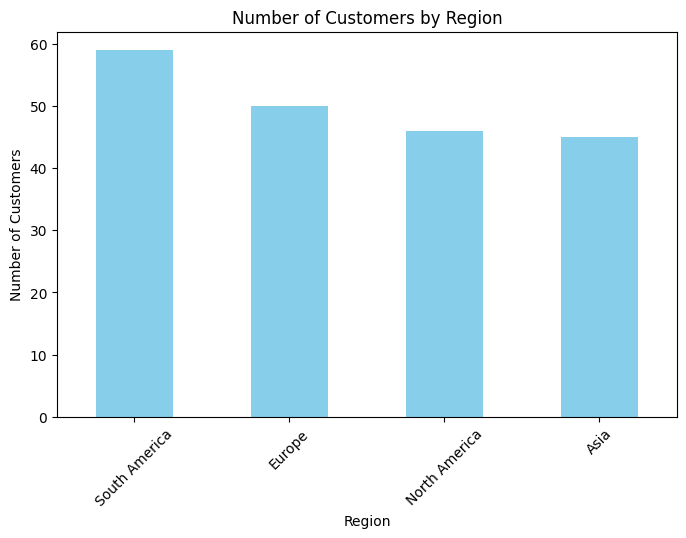

In [8]:
# 3. Exploratory Analysis
## a. Number of customers by region
customers_by_region = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
customers_by_region.plot(kind='bar', color='skyblue')
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

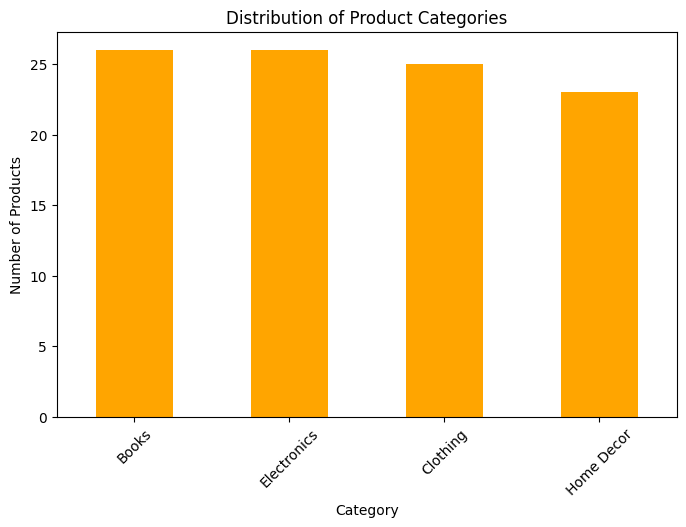

In [9]:
## b. Distribution of product categories
product_categories = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
product_categories.plot(kind='bar', color='orange')
plt.title("Distribution of Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

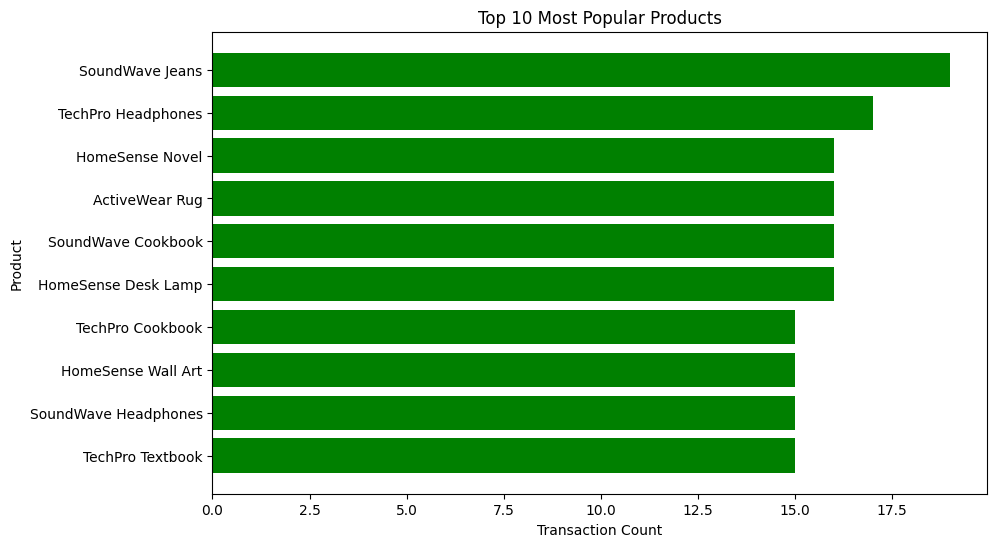

In [11]:
## c. Most popular products by transaction count
popular_products = transactions['ProductID'].value_counts().head(10).reset_index()
popular_products.columns = ['ProductID', 'TransactionCount']
popular_products = popular_products.merge(products, on='ProductID', how='left')
plt.figure(figsize=(10, 6))
plt.barh(popular_products['ProductName'], popular_products['TransactionCount'], color='green')
plt.title("Top 10 Most Popular Products")
plt.xlabel("Transaction Count")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.show()


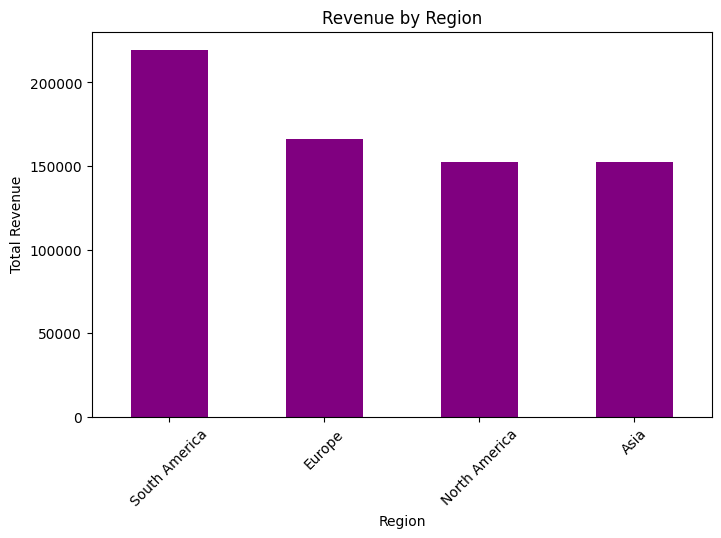

In [12]:
## d. Revenue by region
revenue_by_region = transactions.merge(customers, on='CustomerID', how='left')
revenue_by_region = revenue_by_region.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
revenue_by_region.plot(kind='bar', color='purple')
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

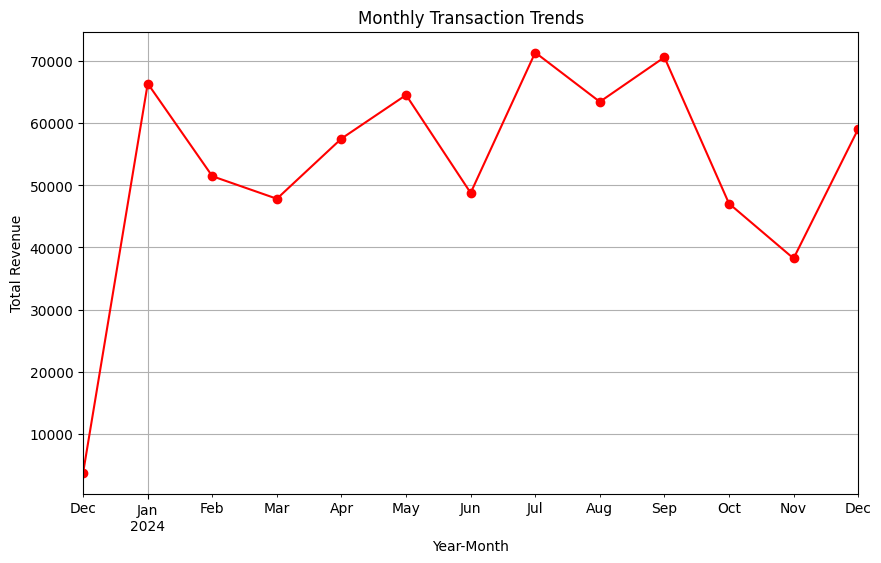

In [13]:
## e. Transaction trends over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
transactions_over_time = transactions.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
transactions_over_time.plot(kind='line', marker='o', color='red')
plt.title("Monthly Transaction Trends")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

# Business Insights:
1. Regional Distribution: Most customers are from a specific region, with South America and Europe having significant representation.
2. Revenue by Category: Electronics and Books categories generate the highest revenue, indicating strong consumer preferences for these product types.
3. Product Popularity: SoundWave Jeans and TechPro Headphones account for the majority of transactions, highlighting opportunities to diversify product offerings and reduce dependency on top-performing items.
4. Revenue by Region: South America contributes the most to revenue, making it a high-priority market for targeted marketing and expansion strategies.
5. Seasonal Trends: Monthly revenue trends reveal seasonal spikes, which could guide marketing campaigns and inventory planning to align with peak demand periods.